In [1]:
from numpy import *
import operator

In [2]:
def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group, labels = createDataSet()

In [4]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [5]:
labels

['A', 'A', 'B', 'B']

In [6]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]  # 0表示行数
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet  # 输入样例与数据集样例的差值
    sqDiffMat = diffMat ** 2  # 差值的平方
    sqDistances = sqDiffMat.sum(axis=1)  # 将每一行的值加起来
    distances = sqDistances ** 0.5  # 求出距离矩阵
    
    sortedDistIndicies = distances.argsort()  # 从小到大排序返回其下标
    classCount = {}  # 统计每个标签出现的次数
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]  # 依次获取前k小的标签
        classCount[str(voteIlabel)] = classCount.get(voteIlabel, 0) + 1  # 标签不存在数值返回0
        
    sortedClassCount = sorted(classCount, key=operator.itemgetter(0), reverse=True)  # 按第一个域降序排列
    return sortedClassCount[0]

In [7]:
classify0([0,0], group, labels, 3)

'B'

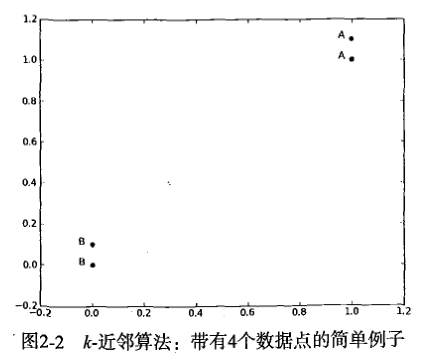

# 海伦约会

In [8]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()  # 每行数据作为一个列表元素
    numberOfLines = len(arrayOLines)  # 行数
    
    returnMat = zeros((numberOfLines, 3))  # 构造一个同等规格的零列表
    classLabelVector = []  # 标签列表
    text2digit = {'largeDoses': 3,
                 'smallDoses': 2,
                 'didntLike': 1}  # 将标签转化为数字
    index = 0
    for line in arrayOLines:
        line = line.strip()  # 去除两边空格
        listFromLine = line.split('\t')  # 将一行中的数据分成列表数据
        returnMat[index, :] = listFromLine[0: 3]  # 复制前三列的数据（即不含标签列）
        classLabelVector.append(text2digit[listFromLine[-1]])  # 复制最后一列数据（即标签列）
        index += 1
    return returnMat, classLabelVector

In [9]:
filename = 'datingTestSet.txt'
datingDataMat, datingLabels = file2matrix(filename)

In [10]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [11]:
datingLabels[0: 20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

In [12]:
import matplotlib
import matplotlib.pyplot as plt

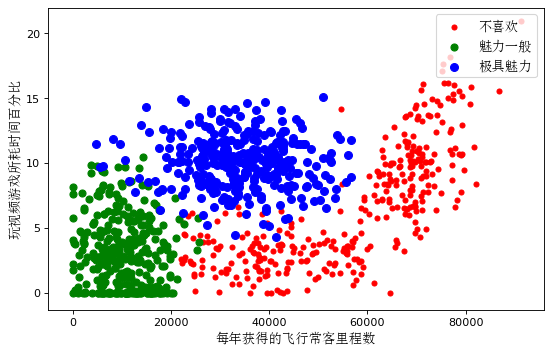

In [13]:
### 绘图参考：https://www.cnblogs.com/pengsky2016/p/8126623.html
zhfont = matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/simsun.ttc',size=12)
plt.figure(figsize=(8, 5), dpi=80)
axes = plt.subplot(111)

# 将三类数据分别取出来，即分别统计各类样本的数据
# x轴代表 每年获得的飞行常客里程数
# y轴代表 玩视频游戏所耗时间百分比
type1_x = []
type1_y = []
type2_x = []
type2_y = []
type3_x = []
type3_y = []

for i in range(len(datingLabels)):
    if datingLabels[i] == 1:  # 不喜欢
        type1_x.append(datingDataMat[i][0])
        type1_y.append(datingDataMat[i][1])
 
    if datingLabels[i] == 2:  # 魅力一般
        type2_x.append(datingDataMat[i][0])
        type2_y.append(datingDataMat[i][1])
 
    if datingLabels[i] == 3:  # 极具魅力
        type3_x.append(datingDataMat[i][0])
        type3_y.append(datingDataMat[i][1])
 
type1 = axes.scatter(type1_x, type1_y, s=20, c='red')
type2 = axes.scatter(type2_x, type2_y, s=40, c='green')
type3 = axes.scatter(type3_x, type3_y, s=50, c='blue')

plt.xlabel(u'每年获得的飞行常客里程数', fontproperties=zhfont)
plt.ylabel(u'玩视频游戏所耗时间百分比', fontproperties=zhfont)
axes.legend((type1, type2, type3), (u'不喜欢', u'魅力一般', u'极具魅力'), loc=1, prop=zhfont)
plt.show()

In [14]:
# 归一化数据
def autoNorm(dataSet):
    minVals = dataSet.min(0)  # 返回每一列最小的元素组成的列表，若参数1表示每行
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]  # 获取行数
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet / tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [15]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [16]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [17]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [18]:
minVals

array([0.      , 0.      , 0.001156])

In [19]:
def datingClassTest():
    hoRotio = 0.1
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')  # 导入数据
    normMat, ranges, minVals = autoNorm(datingDataMat)  # 归一化数据
    
    m = normMat.shape[0]
    numTestVecs = int(m * hoRotio)
    errorCount = 0.0
    for i in range(numTestVecs):
        dataSet = normMat[numTestVecs:m, :]
        labels = datingLabels[numTestVecs:m]
        classifierResult = classify0(normMat[i, :],
                                     dataSet,
                                     labels,
                                     3)
        classifierResult = int(classifierResult)
        print('the classifier came back with: %d, the real answer is: %d' %
             (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
    print('the total error rate is: %f' % (errorCount / float(numTestVecs)))

In [20]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

In [21]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']

    precentTats = float(input('percentage of time spent playing video games?'))
    ffMiles = float(input('frequent flier miles earned per year?'))
    iceCream = float(input('liters of ice cream consumed per year?'))
    
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, precentTats, iceCream])
    inArr = (inArr - minVals) / ranges
    
    classifierResult = int(classify0(inArr, normMat, datingLabels, 3))
    print('You will probably like this person: ', resultList[classifierResult-1])

In [22]:
classifyPerson() # 12 44000 0.5

percentage of time spent playing video games?12
frequent flier miles earned per year?44000
liters of ice cream consumed per year?0.5
You will probably like this person:  in large doses


# 手写识别系统

In [29]:
# 将图像文本转化为向量
def img2vector(filename):
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    return returnVect

In [31]:
testVector = img2vector('testDigits/0_13.txt')
testVector[0, 32:63]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
from os import listdir

In [51]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')  # 获取该文件夹下所有文件名称
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    for i in range(m):  # 遍历每一个文件
        fileNameStr = trainingFileList[i]  # 例如0_0.txt
        fileStr = fileNameStr.split('.')  # 将名称与后缀分离，如['0_0', 'txt']
        classNumStr = int(fileStr[0].split('_')[0])  # 将文本数字提取出现，如0
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('trainingDigits/%s' % fileNameStr)
        
    testFileList = listdir('testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]  # 0_0.txt
        fileStr = fileNameStr.split('.')[0]  # 0_0
        classNumStr = int(fileStr[0].split('_')[0])  # 0
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        
        classifierResult = int(classify0(vectorUnderTest, trainingMat, hwLabels, 3))
#         print('the classifier came back with: %d, the real answer is: %d' % (classifierResult, classNumStr))
        if classifierResult != classNumStr:
            errorCount += 1.0
    print('the total number of error is: %d' % errorCount)
    print('the total error rate is: %f' % (errorCount / float(mTest)))

In [52]:
handwritingClassTest()

the total number of error is: 23
the total error rate is: 0.024313
